<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#BI-RADS" data-toc-modified-id="BI-RADS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>BI-RADS</a></span></li><li><span><a href="#Data-Origin" data-toc-modified-id="Data-Origin-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Origin</a></span></li><li><span><a href="#PCA-Visualization" data-toc-modified-id="PCA-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PCA Visualization</a></span></li><li><span><a href="#T-SNE-Scores" data-toc-modified-id="T-SNE-Scores-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>T-SNE Scores</a></span></li></ul></div>

# Data Exploration

The purpose of this notebook is to provide some insights into the distribution of training data.

In [1]:
# Setup Environment
from utils import *

Progress: [###################-] 97.3%


## BI-RADS

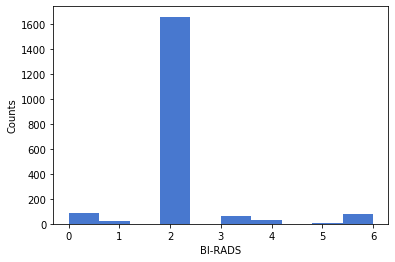

In [2]:
# Plot BI-RADS disribution to highlight class imbalance
plt.hist(explorations['BIRADS'])
plt.xlabel('BI-RADS')
plt.ylabel('Counts')
plt.show()

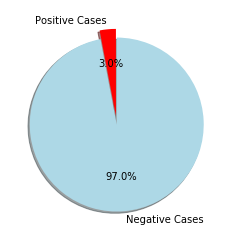

In [3]:
# Positive to negative ratio
cancer = np.where(explorations.BIRADS>3,1,0)
labels = 'Positive Cases', 'Negative Cases'
sizes = [np.sum(cancer), len(cancer)-sum(cancer)]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['red','lightblue'])
plt.show()

## Data Origin 

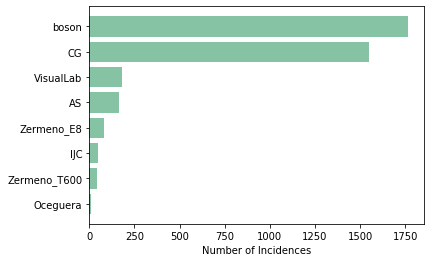

In [4]:
# Explore data origin
fig, ax = plt.subplots()

most_common_cat = explorations.index.get_level_values(2).value_counts().sort_values()
most_common_cat.values

categs = most_common_cat.index
y_pos = np.arange(len(categs))
counts = most_common_cat.values

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, categs)
plt.xlabel('Number of Incidences')
plt.show()

## PCA Visualization

In [5]:
def plot_pcs(df,dropcols, alt_color=True, n_comp=5):
    ''' Plot PCs by BI-RADS.
    
    Inputs
    ----------
    df: pandas dataframe
        Dataframe with features
    alt_color: bool
        Indicator of whether to use alternative colors
    n_comp: int
        Number of PCA components
        
    Returns
    -------
    Plot of PCs
    '''
    pca = PCA(n_components=n_comp)
    pcs = pca.fit_transform(df.drop(dropcols, axis=1))
    pcs = pd.DataFrame(pcs, 
                       columns = ['PC' + str(i+1) 
                                  for i in range(len(pcs[0]))])
    pcs['BIRADS']=df.BIRADS.values
    if alt_color:
        pcs['cancer'] = np.where(pcs.BIRADS>3, 1, 0)
        pcs = pcs.drop(columns=['BIRADS'])
    sns.pairplot(pcs, hue=pcs.columns[-1], 
                 vars=pcs.columns[:-1],
                 diag_kind='hist')
    return pcs

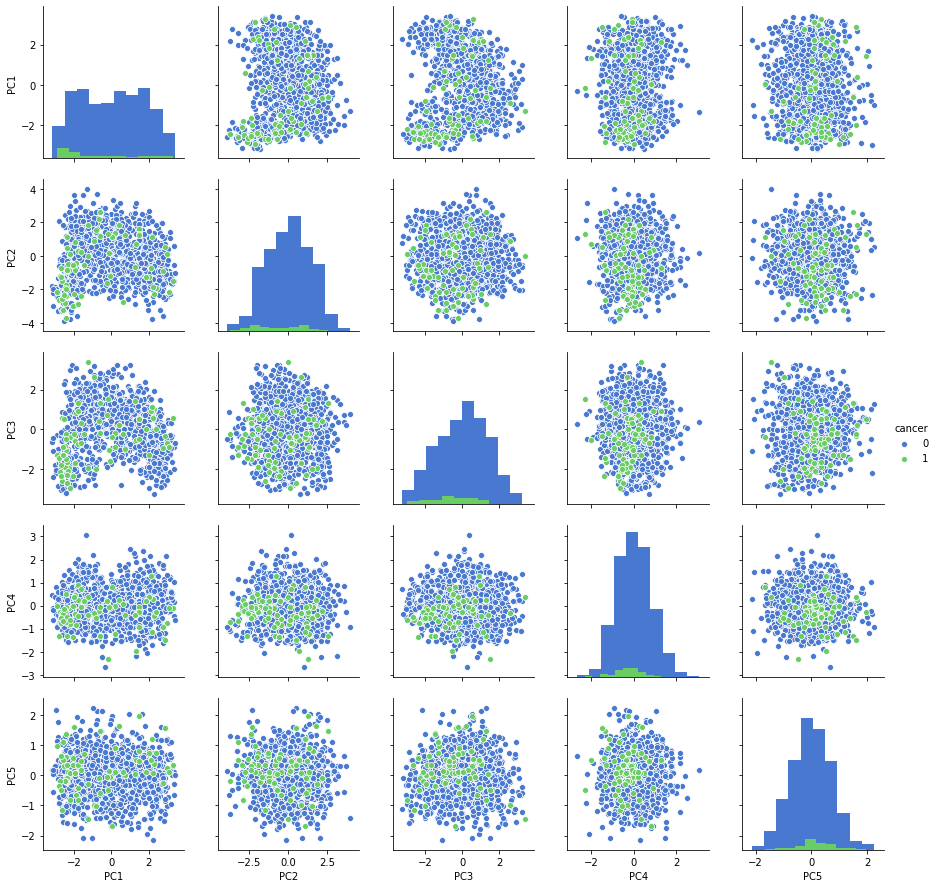

In [6]:
# Plot PCs
dropcols = ['PID', 'vasc', 'lbp_deltas', 'BIRADS']
train_data = pd.read_csv('train_data.csv')
y = np.where(train_data['BIRADS'].values>3, 1, 0)
pcs = plot_pcs(train_data, dropcols)

## T-SNE Scores 

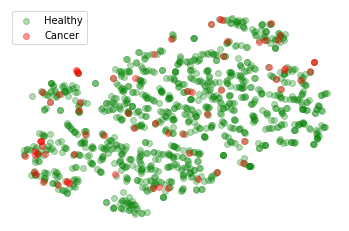

In [7]:
# Plot t-SNE
plot_tsne(train_data.drop(columns=['BIRADS', 'PID']), y)